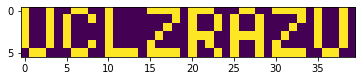

In [2]:
import numpy as np
with open('input.txt','r') as f:
    data=f.read().splitlines()

xs,ys=[],[]
for line in data:
    x,y=map(int,line.split(','))
    xs.append(x)
    ys.append(y)

x_max,y_max=max(xs),max(ys)

# print(x_max,y_max)

xs=np.array(xs)
ys=np.array(ys)

grid=np.zeros((y_max+1,x_max+1),dtype=int)
grid[ys,xs]=1

with open('instructions.txt','r') as f:
    data=f.read().splitlines()

for line in data:
    ax,val = (line.split()[-1]).split('=')
    val=int(val)
    
    if ax=='x':
        tmp=np.fliplr(grid[:,val+1:])
        tx=tmp.shape[1]
        if tx>=val:
            grid=grid[:,:val]+tmp[:,tx-val:]
        else:
            grid=grid[:,:val]
            grid[:,val-tx:]+=tmp
    else:
        tmp=np.flipud(grid[val+1:,:])
        ty=tmp.shape[0]
        if ty>=val:
            grid=grid[:val,:]+tmp[ty-val:,:]
        else:
            grid=grid[:val,:]
            grid[val-ty:,:]+=tmp

import matplotlib.pyplot as plt
plt.imshow((grid>0).astype(int))
plt.show()